# Corporate Prosecution - Exercise Q

#### Summary

Investigate the differences between different states' prosecution of corporate issues.

#### Files

- cpr-data.xls, "detailed information about every federal organizational prosecution since 2001, as well as deferred and non-prosecution agreements with organizations since 1990"

#### Source

[Corpoate Prosecution Registry](http://lib.law.virginia.edu/Garrett/corporate-prosecution-registry/about.html) 

#### Skills

- Working with CSV files
- Counting and summarizing columns
- Searching with strings
- Extracting with strings

# Read in `cpr-data.csv`

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline

In [2]:
df=pd.read_csv("cpr-data.csv")

### Check that your dataframe has 3038 rows and 56 columns.

In [3]:
df.shape

(3038, 56)

### List the columns and their data types

In [4]:
df.dtypes

REC_ID                                                                      int64
COMPANY                                                                    object
DISPOSITION_TYPE                                                           object
PRIMARY_CRIME_CODE                                                         object
SWISS_BANK_PROGRAM                                                         object
USAO                                                                       object
COUNTRY                                                                    object
FINANCIAL_INSTITUTION                                                      object
CASE_NAME                                                                  object
CASE_ID                                                                    object
DOCKET_NO                                                                  object
DATE                                                                       object
JUDGMENT_DATE   

### What do the following columns mean?

- PRIMARY_CRIME_CODE
- DISPOSITION_TYPE
- AGREEMENT_TYPE
- FINE
- TOTAL_PAYMENT
- USAO
- AGREEMENT_REQUIRED_NEW_POSITIONS
- INDEP_MONITOR_REQUIRED

# Customizing the display in pandas

See how the middle of the table has a `...`? Let's fix that.

## How do you see the number of columns pandas will display?

In [5]:
pd.options.display.max_columns

20

## Set pandas to display 60 columns

In [6]:
pd.set_option("display.max_columns", 60)

## How do you see the number of rows pandas will display? Then, set it to display 100 rows at a time.

What does "the number rows pandas will display" actually mean?

In [7]:
pd.options.display.max_rows

60

In [8]:
pd.set_option("display.max_rows", 100)

## Describe the REGULATORY_FINE column to me numerically - maxes, mins, averages.

Do this in **one line.**

In [9]:
df["REGULATORY_FINE"].describe()

count    1.470000e+02
mean     4.905565e+07
std      1.405663e+08
min      0.000000e+00
25%      0.000000e+00
50%      2.000000e+06
75%      2.345000e+07
max      1.000000e+09
Name: REGULATORY_FINE, dtype: float64

### Oh that's ugly ugly ugly. Set pandas to format floats with ZERO decimal points. And tell it to use a `,` in the thousands position.

I'm just going to leave [this here](http://infohost.nmt.edu/~shipman/doc/python27/web/new-str-format.html) for reference. You should definitely come up and ask on the board, though.

In [23]:
pd.set_option("display.float_format", "{:25,.0f}".format)

In [24]:
df["REGULATORY_FINE"].describe()

count                         147
mean                   49,055,647
std                   140,566,295
min                             0
25%                             0
50%                     2,000,000
75%                    23,450,000
max                 1,000,000,000
Name: REGULATORY_FINE, dtype: float64

## Look at the total payments for the first two rows. Pretty nice!

In [28]:
df[["TOTAL_PAYMENT"]].astype(float).head(2)

,TOTAL_PAYMENT
0,"272,734"
1,"24,000"


# A little summarizing

## What were the most popular crimes?

In [29]:
df["PRIMARY_CRIME_CODE"].value_counts()

Environmental                               541
Fraud - General                             484
Antitrust                                   253
Other                                       219
Import / Export                             158
False Statements                            139
Immigration                                 138
FCPA                                        135
Fraud - Tax                                 125
FDCA / Pharma                               113
Act to Prevent Pollution from Ships         103
Wildlife                                     97
Food                                         88
Fraud - Health Care                          84
Money Laundering                             72
Controlled substances / Drugs / Meth Act     55
Bank Secrecy Act                             54
OSHA / Workplace Safety / Mine Safety        31
Fraud - Securities                           31
Kickbacks                                    30
Gambling                                

### Graph the previous answer, with the longest bar on top

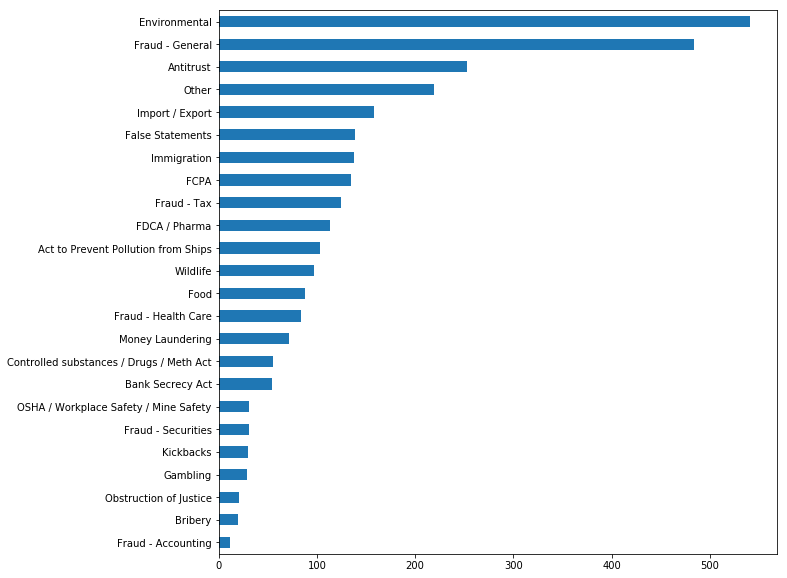

In [32]:
df["PRIMARY_CRIME_CODE"].value_counts().sort_values().plot(kind="barh", figsize=(10,10))

# Column selection

We wanted to view all of those rows, but honestly that's a little silly. **We can't actually see the data we want!** Let's just select the ones we care about.

## Create a new dataframe that only includes the company name, disposition type, primary crime code, US Attorney's Office and total payment.

In [33]:
new_df = df[["COMPANY", "DISPOSITION_TYPE", "PRIMARY_CRIME_CODE", "USAO", "TOTAL_PAYMENT"]]

## Confirm it has 3038 rows and 5 columns

In [34]:
new_df.shape

(3038, 5)

## Using this subset, try to extract the state name of the US Attorney's Office into a separate column called `state`

Your machine will complain. **Let's talk about that error.**

In [87]:
new_df["USAO"]

0                             Virginia - Eastern District
1                             Arkansas - Western District
2                                                 Arizona
3                             Georgia - Northern District
4                             Louisiana - Middle District
5                            New York - Northern District
6                                                  Alaska
7                                              New Jersey
8                                                 Arizona
9                                                 Arizona
10                            Virginia - Western District
11                            Virginia - Western District
12                           Louisiana - Western District
13                            New York - Eastern District
14                                                 Kansas
15                        Mississippi - Northern District
16                                                 Oregon
17            

In [113]:
new_df["state"] = new_df["USAO"].astype(str).str.extract("((\w.*)-?).*")

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [114]:
new_df["state"]

0                             Virginia - Eastern District
1                             Arkansas - Western District
2                                                 Arizona
3                             Georgia - Northern District
4                             Louisiana - Middle District
5                            New York - Northern District
6                                                  Alaska
7                                              New Jersey
8                                                 Arizona
9                                                 Arizona
10                            Virginia - Western District
11                            Virginia - Western District
12                           Louisiana - Western District
13                            New York - Eastern District
14                                                 Kansas
15                        Mississippi - Northern District
16                                                 Oregon
17            

## Look at the first 25 states.

Confirm they match the following. If they don't, improve your technique from above.

    0        Virginia
    1        Arkansas
    2         Arizona
    3         Georgia
    4       Louisiana
    5        New York
    6          Alaska
    7      New Jersey
    8         Arizona
    9         Arizona
    10       Virginia
    11       Virginia
    12      Louisiana
    13       New York
    14         Kansas
    15    Mississippi
    16         Oregon
    17        Florida
    18     California
    19      Louisiana
    20        Vermont
    21       New York
    22       New York
    23          USDOJ
    24          USDO

## Hmm, maybe you should clean that up a little more and try again.

## Which state has had the most total cases?

## Which state has had the most total fines?

## Show me both the count AND the sum in the same dataframe

- Tip: There's a quick way to do this if you'd like

## Graph that, but only for "real" states

Here's a list of state names, if you'd like:

    ['Alaska', 'Alabama', 'Arkansas', 'American Samoa', 'Arizona', 'California', 'Colorado', 'Connecticut', 'District of Columbia', 'Delaware', 'Florida', 'Georgia', 'Guam', 'Hawaii', 'Iowa', 'Idaho', 'Illinois', 'Indiana', 'Kansas', 'Kentucky', 'Louisiana', 'Massachusetts', 'Maryland', 'Maine', 'Michigan', 'Minnesota', 'Missouri', 'Northern Mariana Islands', 'Mississippi', 'Montana', 'National', 'North Carolina', 'North Dakota', 'Nebraska', 'New Hampshire', 'New Jersey', 'New Mexico', 'Nevada', 'New York', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania', 'Puerto Rico', 'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee', 'Texas', 'Utah', 'Virginia', 'Virgin Islands', 'Vermont', 'Washington', 'Wisconsin', 'West Virginia', 'Wyoming']

## What are the states that have so many prosecutions but so little money?

# Make another comparison between two groups in the full dataset

For example, "cases before 2003 were likely to be about this, but after 2003 they became about something else."